# Classical text representation

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "I love natural language processing",
    "NLP is fascinating",
    "Processing text data is important for AI"
]

# Create BoW representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(documents)

# Get feature names (vocabulary)
feature_names = vectorizer.get_feature_names_out()

# Print the vocabulary and document vectors
print("Vocabulary:", feature_names)
print("Document vectors:\n", X.toarray())

Vocabulary: ['ai' 'data' 'fascinating' 'for' 'important' 'is' 'language' 'love'
 'natural' 'nlp' 'processing' 'text']
Document vectors:
 [[0 0 0 0 0 0 1 1 1 0 1 0]
 [0 0 1 0 0 1 0 0 0 1 0 0]
 [1 1 0 1 1 1 0 0 0 0 1 1]]


2. N-Grams for context capture

N-grams are sequences of n items from a given text. They help capture some context and word order information.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "I love natural language processing",
    "NLP is fascinating",
    "Processing text data is important for AI"
]

# Create bigram representation
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_bigram = bigram_vectorizer.fit_transform(documents)

# Get feature names (vocabulary)
bigram_features = bigram_vectorizer.get_feature_names_out()

# Print the bigram vocabulary and document vectors
print("Bigram vocabulary:", bigram_features)
print("Bigram document vectors:\n", X_bigram.toarray())

# Compare vocabulary sizes
print(f"Unigram vocabulary size: {len(CountVectorizer().fit(documents).get_feature_names_out())}")
print(f"Bigram vocabulary size: {len(bigram_features)}")

Bigram vocabulary: ['data is' 'for ai' 'important for' 'is fascinating' 'is important'
 'language processing' 'love natural' 'natural language' 'nlp is'
 'processing text' 'text data']
Bigram document vectors:
 [[0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 1 0 0 0 0 1 0 0]
 [1 1 1 0 1 0 0 0 0 1 1]]
Unigram vocabulary size: 12
Bigram vocabulary size: 11


3. Why Word Embeddings Improve Over BOW and TF-IDF ?

1. Semantic Understanding

The most significant advantage of word embeddings is their ability to capture semantic relationships between words, unlike BOW and TF-IDF which treat words as isolated units.

In [1]:
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api

model = api.load("glove-twitter-25")  # load glove vectors
model.most_similar("cat")  # show words that similar to word 'cat'

[('dog', 0.9590820074081421),
 ('monkey', 0.920357882976532),
 ('bear', 0.9143136739730835),
 ('pet', 0.9108031392097473),
 ('girl', 0.8880629539489746),
 ('horse', 0.8872726559638977),
 ('kitty', 0.8870542049407959),
 ('puppy', 0.886769711971283),
 ('hot', 0.886525571346283),
 ('lady', 0.8845519423484802)]

Visual Representation

Imagine we have 3 documents with these representations:

BOW/TF-IDF (10 dimensions, sparse):

Doc 1: [1, 0, 1, 0, 1, 0, 0, 0, 0, 0]  (3 non-zeros)

Doc 2: [0, 1, 0, 1, 0, 1, 0, 0, 0, 0]  (3 non-zeros)

Doc 3: [0, 0, 0, 0, 1, 0, 1, 1, 1, 0]  (4 non-zeros)

Word2Vec (5 dimensions, dense - simplified for illustration):

Doc 1: [0.2, -0.5, 0.3, 0.1, -0.4]  (all non-zero)

Doc 2: [-0.3, 0.2, 0.4, -0.6, 0.1]  (all non-zero)

Doc 3: [0.5, 0.3, -0.1, -0.2, 0.7]  (all non-zero)

The BOW/TF-IDF approach requires 10 dimensions to represent the documents, but most values are zeros.

The Word2Vec approach uses only 5 dimensions, yet every value carries semantic meaning, making it more information-dense.

#### In a Vector space how is the vectors represented ?

Word Space Concept: Vector algebra in embeddings

In [5]:
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api

model = api.load("glove-wiki-gigaword-100")  # load glove vectors
result = model.most_similar(positive=['woman','king'],negative=['man']) 
result[0]

('queen', 0.7698540687561035)

In [4]:
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api

result = model['man']
result

array([ 3.7293e-01,  3.8503e-01,  7.1086e-01, -6.5911e-01, -1.0128e-03,
        9.2715e-01,  2.7615e-01, -5.6203e-02, -2.4294e-01,  2.4632e-01,
       -1.8449e-01,  3.1398e-01,  4.8983e-01,  9.2560e-02,  3.2958e-01,
        1.5056e-01,  5.7317e-01, -1.8529e-01, -5.2277e-01,  4.6191e-01,
        9.2038e-01,  3.1001e-02, -1.6246e-01, -4.0567e-01,  7.8621e-01,
        5.7722e-01, -5.3501e-01, -6.8228e-01,  1.6987e-01,  3.6310e-01,
       -7.1773e-02,  4.7233e-01,  2.7806e-02, -1.4951e-01,  1.7543e-01,
       -3.7573e-01, -7.8517e-01,  5.8171e-01,  8.6859e-01,  3.1445e-02,
       -4.5897e-01, -4.0917e-02,  9.5897e-01, -1.6975e-01,  1.3045e-01,
        2.7434e-01, -6.9485e-02,  2.2402e-02,  2.4977e-01, -2.1536e-01,
       -3.2406e-01, -3.9867e-01,  6.8613e-01,  1.7923e+00, -3.7848e-01,
       -2.2477e+00, -7.7025e-01,  4.6582e-01,  1.2411e+00,  5.7756e-01,
        4.1151e-01,  8.4328e-01, -5.4259e-01, -1.6715e-01,  7.3927e-01,
       -9.3477e-02,  9.0278e-01,  5.0889e-01, -5.0031e-01,  2.64

CBOW - SkipGram

In [4]:
import gensim.downloader as api
import numpy as np

# List available models
print("Available models:")
print(api.info()['models'].keys())

# Load pretrained Word2Vec model
# Popular options: 'word2vec-google-news-300', 'glove-wiki-gigaword-100', etc.
model = api.load('glove-wiki-gigaword-100')

# CBOW Example
def cbow_predict(context_words, model, topn=5):
    """
    Predict target word given context words using CBOW approach
    """
    context_vectors = []
    valid_words = []
    
    for word in context_words:
        if word in model:
            context_vectors.append(model[word])
            valid_words.append(word)
    
    if not context_vectors:
        return f"No valid words found in vocabulary. Tried: {context_words}"
    
    # Average the context vectors (CBOW approach)
    context_vector = np.mean(context_vectors, axis=0)
    
    # Find most similar words to the averaged vector
    similar_words = model.similar_by_vector(context_vector, topn=topn)
    
    return similar_words, valid_words

# Skip-gram Example
def skipgram_predict(target_word, model, topn=5):
    """
    Predict context words given a target word using Skip-gram approach
    """
    if target_word not in model:
        return f"'{target_word}' not found in vocabulary"
    
    # Get similar words (potential context words)
    similar_words = model.most_similar(target_word, topn=topn)
    
    return similar_words

# Test CBOW
print("\n=== CBOW Example ===")
context = ["The", "cat", "on", "the", "mat"]
predictions, valid_words = cbow_predict(context, model)
print(f"Context: {context}")
print(f"Valid words used: {valid_words}")
print("Predicted words:")
for word, similarity in predictions:
    print(f"  {word}: {similarity:.3f}")

# Test Skip-gram
print("\n=== Skip-gram Example ===")
target = "king"
context_predictions = skipgram_predict(target, model)
print(f"Target word: {target}")
print("Predicted context words:")
for word, similarity in context_predictions:
    print(f"  {word}: {similarity:.3f}")


Available models:
dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])

=== CBOW Example ===
Context: ['The', 'cat', 'on', 'the', 'mat']
Valid words used: ['cat', 'on', 'the', 'mat']
Predicted words:
  on: 0.861
  the: 0.840
  one: 0.797
  out: 0.793
  as: 0.769

=== Skip-gram Example ===
Target word: king
Predicted context words:
  prince: 0.768
  queen: 0.751
  son: 0.702
  brother: 0.699
  monarch: 0.698


# PyTorch problems

In [52]:
# https://github.com/Amr-Abdellatif/learn-deep-learning-using-pytorch/blob/main/videos_walkthrough/01_starting_pytorch_workflow_video.ipynb

# Training a NER model

how to build ner model ?
1. dataset
2. framework that supports building ner models -> spacy
3. what is the shape of the dataset i need to make it work with spacy 
4. build training pipeline
5. evaluate

In [1]:
# !pip install spacy datasets tqdm -q

import spacy
from spacy.training import Example
import random
from datasets import load_dataset
from tqdm import tqdm

c:\Users\Amr osama abdellatif\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
# Load the dataset
dataset = load_dataset("eriktks/conll2003", trust_remote_code=True)

# Explore the dataset structure
print("Dataset splits:", dataset.keys())
print("\nNumber of examples in each split:")
print(f"Train: {len(dataset['train'])}")
print(f"Validation: {len(dataset['validation'])}")  
print(f"Test: {len(dataset['test'])}")

# Look at one example
example = dataset['train'][0]
print("\nFirst training example:")
print(f"Tokens: {example['tokens']}")
print(f"NER tags: {example['ner_tags']}")

# See what the tag numbers mean
tag_names = dataset['train'].features['ner_tags'].feature.names
print(f"\nNER tag names: {tag_names}")

Dataset splits: dict_keys(['train', 'validation', 'test'])

Number of examples in each split:
Train: 14041
Validation: 3250
Test: 3453

First training example:
Tokens: ['EU', 'rejects', 'German', 'call', 'to', 'boycott', 'British', 'lamb', '.']
NER tags: [3, 0, 7, 0, 0, 0, 7, 0, 0]

NER tag names: ['O', 'B-PER', 'I-PER', 'B-ORG', 'I-ORG', 'B-LOC', 'I-LOC', 'B-MISC', 'I-MISC']


Displaying the NER tags

In [55]:
from datasets import load_dataset
from spacy import displacy
from IPython.display import HTML

# Load the dataset
dataset = load_dataset("eriktks/conll2003", trust_remote_code=True)

# Get tag names
tag_names = dataset['train'].features['ner_tags'].feature.names

def convert_to_displacy_format(tokens, ner_tags, tag_names):
    """Convert CoNLL format to displacy format."""
    
    # First, reconstruct the text
    text = " ".join(tokens)
    
    # Find entities with their positions
    entities = []
    current_entity = None
    current_start = 0
    current_position = 0
    
    for i, (token, tag_idx) in enumerate(zip(tokens, ner_tags)):
        tag = tag_names[tag_idx]
        
        # Calculate token position in text
        token_start = current_position
        token_end = current_position + len(token)
        
        if tag.startswith('B-'):  # Beginning of entity
            # Save previous entity if exists
            if current_entity:
                entities.append(current_entity)
            
            # Start new entity
            entity_type = tag[2:]  # Remove 'B-' prefix
            current_entity = {
                'start': token_start,
                'end': token_end,
                'label': entity_type
            }
        
        elif tag.startswith('I-'):  # Inside entity
            if current_entity:
                current_entity['end'] = token_end
        
        else:  # tag == 'O'
            if current_entity:
                entities.append(current_entity)
                current_entity = None
        
        # Update position for next token (add space)
        current_position = token_end + 1
    
    # Don't forget the last entity
    if current_entity:
        entities.append(current_entity)
    
    # Create the format expected by displacy
    return {
        "text": text,
        "ents": entities,
        "title": None
    }

# Prepare multiple examples
examples = []
for i in range(5):  # Display first 5 examples
    example = dataset['train'][i]
    displacy_format = convert_to_displacy_format(
        example['tokens'], 
        example['ner_tags'], 
        tag_names
    )
    examples.append(displacy_format)

# Render with displacy
html = displacy.render(
    examples, 
    style="ent", 
    manual=True,
    options={"colors": {
        "PER": "#85C1E9",  # Blue for persons
        "ORG": "#82E0AA",  # Green for organizations  
        "LOC": "#F8C471",  # Yellow for locations
        "MISC": "#BB8FCE"  # Purple for miscellaneous
    }}
)

# Display in Jupyter
HTML(html)

<IPython.core.display.HTML object>

In [3]:
def get_conll_data(split="train"):
    """
    Loads CoNLL-2003 data from Hugging Face datasets
    Returns training examples in spaCy format
    
    Args:
        split: Which dataset split to load ('train', 'validation', or 'test')
    
    Returns:
        List of tuples: (text, {"entities": [(start, end, label)]})
    """
    # Load dataset
    dataset = load_dataset("eriktks/conll2003", trust_remote_code=True)
    data = dataset[split]
    
    # Convert to spaCy format
    spacy_data = []
    
    for example in tqdm(data, desc=f"Processing {split} data"):
        tokens = example["tokens"]
        ner_tags = example["ner_tags"]
        
        # Map numeric tags to BIO labels (B-PER, I-PER, O, etc.)
        tag_names = dataset["train"].features["ner_tags"].feature.names
        bio_tags = [tag_names[tag] for tag in ner_tags]
        
        # Build entity spans
        entities = []
        start = 0
        
        for i, (token, bio_tag) in enumerate(zip(tokens, bio_tags)):
            end = start + len(token)
            
            if bio_tag != "O":  # "O" means no entity
                if bio_tag.startswith("B-"):  # Beginning of entity
                    entity_type = bio_tag[2:]  # Remove "B-" prefix
                    entities.append((start, end, entity_type))
                elif bio_tag.startswith("I-") and entities and i > 0:  # Inside entity
                    # Check if it continues the previous entity
                    prev_tag = bio_tags[i-1]
                    if prev_tag[2:] == bio_tag[2:]:  # Same entity type
                        # Extend the previous entity
                        entities[-1] = (entities[-1][0], end, entities[-1][2])
            
            start = end + 1  # Add space between tokens
        
        text = " ".join(tokens)
        spacy_data.append((text, {"entities": entities}))
    
    return spacy_data

In [4]:
# Process a small sample
train_data = get_conll_data("train")

# Look at the first processed example
text, annotations = train_data[0]
print(f"Text: {text}")
print(f"Entities: {annotations['entities']}")

# Visualize entities in the text
for start, end, label in annotations['entities']:
    print(f"  '{text[start:end]}' -> {label}")

Processing train data: 100%|██████████| 14041/14041 [00:09<00:00, 1433.40it/s]

Text: EU rejects German call to boycott British lamb .
Entities: [(0, 2, 'ORG'), (11, 17, 'MISC'), (34, 41, 'MISC')]
  'EU' -> ORG
  'German' -> MISC
  'British' -> MISC


In [6]:
def train_ner_model(training_data, n_iter=10):
    """
    Trains a simple NER model using spaCy
    
    Args:
        training_data: List of (text, annotations) tuples
        n_iter: Number of training iterations
    
    Returns:
        Trained spaCy model
    """
    # Create blank English model
    nlp = spacy.blank("en")
    
    # Add NER pipeline component
    ner = nlp.add_pipe("ner")
    
    # Add entity labels to the model
    for text, annotations in training_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])
    
    # Create training examples
    examples = []
    for text, annotations in training_data:
        doc = nlp.make_doc(text)
        example = Example.from_dict(doc, annotations)
        examples.append(example)
    
    # Initialize the model with labels
    nlp.initialize()
    
    # Training loop
    for i in range(n_iter):
        random.shuffle(examples)  # Shuffle for better training
        losses = {}
        
        # Train in batches
        for j in range(0, len(examples), 8):
            batch = examples[j:j+8]
            nlp.update(
                batch,
                drop=0.5,  # Dropout for regularization
                losses=losses
            )
        
        print(f"Iteration {i+1}, Losses: {losses}")
    
    return nlp

In [7]:
# Load training data
train_data = get_conll_data("train")
test_data = get_conll_data("test")

# Use a subset for faster training (you can increase this)
train_subset = train_data[:1000]

print(f"Training on {len(train_subset)} examples...")
nlp = train_ner_model(train_subset, n_iter=5)

Processing test data: 100%|██████████| 3453/3453 [00:02<00:00, 1581.72it/s]


Training on 1000 examples...
Iteration 1, Losses: {'ner': 3494.612901667064}
Iteration 2, Losses: {'ner': 1706.0891462944703}
Iteration 3, Losses: {'ner': 1664.1500950603331}
Iteration 4, Losses: {'ner': 1422.9610172209104}
Iteration 5, Losses: {'ner': 1319.0509184525285}


In [8]:
def evaluate_model(nlp, test_data):
    """
    Simple evaluation of the model
    
    Args:
        nlp: Trained spaCy model
        test_data: List of (text, annotations) tuples
    """
    correct = 0
    total = 0
    
    # Evaluate on first 100 examples (for speed)
    for text, annotations in test_data[:100]:
        doc = nlp(text)
        
        # Get predicted entities
        pred_entities = [(ent.start_char, ent.end_char, ent.label_) 
                        for ent in doc.ents]
        
        # Get true entities
        true_entities = annotations["entities"]
        
        # Count exact matches
        correct += len(set(pred_entities) & set(true_entities))
        total += len(true_entities)
    
    precision = correct / total if total > 0 else 0
    print(f"\nSimple evaluation - Correct: {correct}/{total} ({precision:.2%})")

evaluate_model(nlp, test_data)


Simple evaluation - Correct: 161/217 (74.19%)


In [56]:
from datasets import load_dataset
from tqdm import tqdm

def get_conll_test_examples(dataset, num_examples=5):
    """
    Extract test examples from CoNLL dataset in the format needed for testing
    
    Args:
        dataset: Loaded CoNLL dataset
        num_examples: Number of examples to extract
    
    Returns:
        List of (text, entities) tuples
    """
    test_data = dataset['test']
    tag_names = dataset['train'].features['ner_tags'].feature.names
    
    test_examples = []
    
    for i in range(min(num_examples, len(test_data))):
        example = test_data[i]
        tokens = example['tokens']
        ner_tags = example['ner_tags']
        
        # Reconstruct text with proper spacing
        text = " ".join(tokens)
        
        # Extract entities with character positions
        entities = []
        char_pos = 0
        
        for j, (token, tag_idx) in enumerate(zip(tokens, ner_tags)):
            tag = tag_names[tag_idx]
            
            if tag != "O":  # Not outside an entity
                if tag.startswith("B-"):  # Beginning of entity
                    entity_type = tag[2:]
                    start_pos = char_pos
                    end_pos = char_pos + len(token)
                    entities.append((start_pos, end_pos, entity_type))
                elif tag.startswith("I-") and entities:  # Inside entity
                    # Extend the last entity
                    last_entity = entities[-1]
                    if tag[2:] == last_entity[2]:  # Same entity type
                        entities[-1] = (last_entity[0], char_pos + len(token), last_entity[2])
            
            char_pos += len(token) + 1  # +1 for space
        
        test_examples.append((text, entities))
    
    return test_examples

def test_model_with_ground_truth(nlp, test_examples):
    """
    Tests the model and compares with ground truth
    
    Args:
        nlp: Trained spaCy model
        test_examples: List of (text, entities) tuples
    """
    total_correct = 0
    total_entities = 0
    total_predictions = 0
    
    for i, (text, true_entities) in enumerate(test_examples):
        doc = nlp(text)
        
        # Get predictions
        pred_entities = [(ent.text, ent.start_char, ent.end_char, ent.label_) 
                        for ent in doc.ents]
        
        print(f"\n{'='*60}")
        print(f"Example {i+1}: {text[:100]}...")
        print(f"{'='*60}")
        
        # Show ground truth
        print("\nGround Truth Entities:")
        for start, end, label in true_entities:
            entity_text = text[start:end]
            print(f"  '{entity_text}' [{start}:{end}] -> {label}")
        
        # Show predictions
        print("\nPredicted Entities:")
        for entity_text, start, end, label in pred_entities:
            print(f"  '{entity_text}' [{start}:{end}] -> {label}")
        
        # Calculate accuracy
        true_set = set((start, end, label) for start, end, label in true_entities)
        pred_set = set((start, end, label) for entity_text, start, end, label in pred_entities)
        
        correct = len(true_set & pred_set)
        total = len(true_set)
        accuracy = correct / total if total > 0 else 0
        
        print(f"\nAccuracy: {correct}/{total} ({accuracy:.2%})")
        
        total_correct += correct
        total_entities += len(true_entities)
        total_predictions += len(pred_entities)
    
    # Overall metrics
    precision = total_correct / total_predictions if total_predictions > 0 else 0
    recall = total_correct / total_entities if total_entities > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\n{'='*60}")
    print(f"Overall Performance:")
    print(f"{'='*60}")
    print(f"Total Correct: {total_correct}")
    print(f"Total Ground Truth Entities: {total_entities}")
    print(f"Total Predicted Entities: {total_predictions}")
    print(f"Precision: {precision:.2%}")
    print(f"Recall: {recall:.2%}")
    print(f"F1 Score: {f1:.2%}")

# Load dataset
dataset = load_dataset("eriktks/conll2003", trust_remote_code=True)

# Get test examples
test_examples = get_conll_test_examples(dataset, num_examples=10)

# Test the model
test_model_with_ground_truth(nlp, test_examples)


Example 1: SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRISE DEFEAT ....

Ground Truth Entities:
  'JAPAN' [9:14] -> LOC
  'CHINA' [31:36] -> PER

Predicted Entities:
  'JAPAN' [9:14] -> LOC
  'CHINA' [31:36] -> LOC

Accuracy: 1/2 (50.00%)

Example 2: Nadim Ladki...

Ground Truth Entities:
  'Nadim Ladki' [0:11] -> PER

Predicted Entities:
  'Nadim Ladki' [0:11] -> PER

Accuracy: 1/1 (100.00%)

Example 3: AL-AIN , United Arab Emirates 1996-12-06...

Ground Truth Entities:
  'AL-AIN' [0:6] -> LOC
  'United Arab Emirates' [9:29] -> LOC

Predicted Entities:
  'AL' [0:2] -> MISC
  'AIN' [3:6] -> ORG
  'United Arab Emirates' [9:29] -> PER

Accuracy: 0/2 (0.00%)

Example 4: Japan began the defence of their Asian Cup title with a lucky 2-1 win against Syria in a Group C cha...

Ground Truth Entities:
  'Japan' [0:5] -> LOC
  'Asian Cup' [33:42] -> MISC
  'Syria' [78:83] -> LOC

Predicted Entities:
  'Japan' [0:5] -> ORG
  'Asian Cup title' [33:48] -> MISC
  'Syria' [78:83] -> LOC
  'Group' [8

In [11]:
from spacy import displacy

# Visualize entities
text = "Apple Inc. CEO Tim Cook announced new products in Cupertino, California."
doc = nlp(text)

# Display the entities
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
# Save the model
nlp.to_disk("./ner_model")
print("Model saved to ./ner_model")

# To load the model later:
# loaded_nlp = spacy.load("./ner_model")

# Training an Embedding model

In [12]:
# !pip install torch transformers datasets tokenizers sentencepiece -q
# !pip install matplotlib scikit-learn numpy -q

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from datasets import load_dataset
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace
from collections import Counter
import random
from tqdm import tqdm

c:\Users\Amr osama abdellatif\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Load dataset
dataset = load_dataset("wikitext", "wikitext-2-raw-v1")

# Get text data
train_texts = dataset["train"]["text"]
valid_texts = dataset["validation"]["text"]

# Filter out empty lines
train_texts = [text for text in train_texts if text.strip()]
valid_texts = [text for text in valid_texts if text.strip()]

print(f"Training samples: {len(train_texts)}")
print(f"Validation samples: {len(valid_texts)}")
print(f"\nFirst training example: {train_texts[0][:]}...")
print(f"\nFirst training example: {train_texts[1][:]}...")

Training samples: 23767
Validation samples: 2461

First training example:  = Valkyria Chronicles III = 
...

First training example:  Senjō no Valkyria 3 : Unrecorded Chronicles ( Japanese : 戦場のヴァルキュリア3 , lit . Valkyria of the Battlefield 3 ) , commonly referred to as Valkyria Chronicles III outside Japan , is a tactical role @-@ playing video game developed by Sega and Media.Vision for the PlayStation Portable . Released in January 2011 in Japan , it is the third game in the Valkyria series . Employing the same fusion of tactical and real @-@ time gameplay as its predecessors , the story runs parallel to the first game and follows the " Nameless " , a penal military unit serving the nation of Gallia during the Second Europan War who perform secret black operations and are pitted against the Imperial unit " Calamaty Raven " . 
...


In [8]:
# Initialize tokenizer
tokenizer = Tokenizer(WordLevel(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()

# Train tokenizer
trainer = WordLevelTrainer(
    special_tokens=["[UNK]"],
    min_frequency=2
)

# Train on our corpus
tokenizer.train_from_iterator(train_texts, trainer)

# Save tokenizer
tokenizer.save("tokenizer.json")

print(f"Vocabulary size: {tokenizer.get_vocab_size()}")

# The tokenizer learns from our training texts
# It builds a vocabulary of all words that appear ≥2 times
# It assigns each word a unique number (ID)
# This creates a mapping: word ↔ number

Vocabulary size: 30000


In [9]:
# Now let's create a dataset class for the Skip-gram model
#  (predicts context words from target word):


class SkipGramDataset(Dataset):
    def __init__(self, texts, tokenizer, window_size=2):
        self.window_size = window_size
        self.tokenizer = tokenizer
        self.data = []
        
        # Create skip-gram pairs
        for text in tqdm(texts, desc="Creating dataset"):
            # Tokenize text
            encoding = tokenizer.encode(text)
            tokens = encoding.ids
            
            # Create (target, context) pairs
            for i, target in enumerate(tokens):
                # Get context window
                start = max(0, i - window_size)
                end = min(len(tokens), i + window_size + 1)
                
                # Add each context word as a separate training example
                for j in range(start, end):
                    if i != j:  # Skip the target word itself
                        self.data.append((target, tokens[j]))
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        target, context = self.data[idx]
        return torch.tensor(target), torch.tensor(context)

# Create datasets
train_dataset = SkipGramDataset(train_texts[:1000], tokenizer)  # Using subset for speed
valid_dataset = SkipGramDataset(valid_texts[:100], tokenizer)

print(f"Training pairs: {len(train_dataset)}")
print(f"Validation pairs: {len(valid_dataset)}")

Creating dataset:   0%|          | 0/1000 [00:00<?, ?it/s]

Creating dataset: 100%|██████████| 100/100 [00:00<00:00, 4348.10it/s]

Training pairs: 349964
Validation pairs: 36416


In [ ]:
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        
        # Target word embeddings
        self.target_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        # Context word embeddings  
        self.context_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
    def forward(self, target_ids, context_ids):
        # Get embeddings
        target_embeds = self.target_embeddings(target_ids)
        context_embeds = self.context_embeddings(context_ids)
        
        # Compute dot product
        scores = torch.sum(target_embeds * context_embeds, dim=1)
        
        return scores

# Initialize model
vocab_size = tokenizer.get_vocab_size()
embedding_dim = 100
model = SkipGram(vocab_size, embedding_dim)

print(f"Model initialized with vocab_size={vocab_size}, embedding_dim={embedding_dim}")

Model initialized with vocab_size=30000, embedding_dim=100


In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' 
model.to(device) 

class NegativeSamplingLoss(nn.Module):
    def __init__(self):
        super(NegativeSamplingLoss, self).__init__()
        
    def forward(self, positive_scores, negative_scores):
        # Loss for positive samples (should be high)
        positive_loss = -torch.log(torch.sigmoid(positive_scores)).mean()
        
        # Loss for negative samples (should be low)
        negative_loss = -torch.log(torch.sigmoid(-negative_scores)).mean()
        
        return positive_loss + negative_loss

def get_negative_samples(batch_size, vocab_size, num_negatives=5, device='cuda'): # Added device argument
    """Generate negative samples for training"""
    return torch.randint(0, vocab_size, (batch_size * num_negatives,), device=device) # Create tensor on specified device

def train_epoch(model, dataloader, optimizer, criterion, vocab_size, num_negatives=5, device='cuda'):
    model.train()
    total_loss = 0
    
    for target_ids, context_ids in tqdm(dataloader, desc="Training"):
        # Move data to device
        target_ids = target_ids.to(device)
        context_ids = context_ids.to(device)
        
        optimizer.zero_grad()
        
        # Positive samples
        positive_scores = model(target_ids, context_ids)
        
        # Negative samples
        batch_size = target_ids.size(0)
        negative_context_ids = get_negative_samples(batch_size, vocab_size, num_negatives)
        negative_context_ids = negative_context_ids.to(device)  # Move to device
        
        # Expand target_ids for negative samples
        target_ids_expanded = target_ids.repeat_interleave(num_negatives)
        negative_scores = model(target_ids_expanded, negative_context_ids)
        
        # Calculate loss
        loss = criterion(positive_scores, negative_scores)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    return total_loss / len(dataloader)

c:\Users\Amr osama abdellatif\AppData\Local\Programs\Python\Python312\Lib\site-packages\onnxruntime\capi\onnxruntime_validation.py:26: UserWarning: Unsupported Windows version (11). ONNX Runtime supports Windows 10 and above, only.
  warnings.warn(
Training: 100%|██████████| 2735/2735 [00:14<00:00, 192.61it/s]


Epoch 1/1, Loss: 6.4895


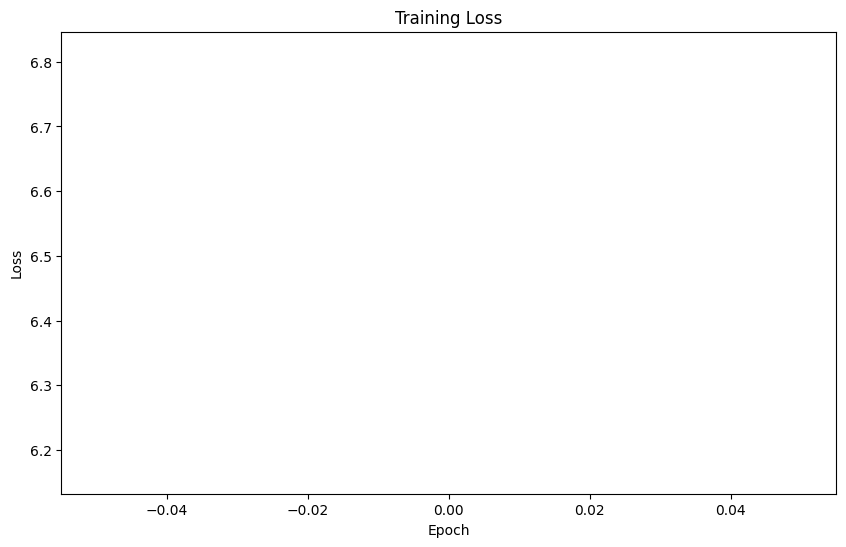

In [12]:
# Training settings
batch_size = 128
learning_rate = 0.001
num_epochs = 1
num_negatives = 5

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size)

# Initialize optimizer and loss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = NegativeSamplingLoss()

# Training loop
train_losses = []
for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, optimizer, criterion, vocab_size, num_negatives, device='cuda')
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}")

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [34]:
def get_word_embedding(word, tokenizer, model):
    """Get embedding for a word"""
    model.cpu()
    token_id = tokenizer.encode(word).ids[0]
    embedding = model.target_embeddings.weight[token_id].detach().numpy()
    return embedding

def find_similar_words(word, tokenizer, model, top_k=5):
    """Find most similar words based on cosine similarity"""
    # Get embedding for target word
    target_embedding = get_word_embedding(word, tokenizer, model)
    
    # Get all embeddings
    all_embeddings = model.target_embeddings.weight.detach().numpy()
    
    # Calculate cosine similarities
    similarities = np.dot(all_embeddings, target_embedding)
    similarities /= np.linalg.norm(all_embeddings, axis=1) * np.linalg.norm(target_embedding)
    
    # Get top k similar words
    top_indices = np.argsort(similarities)[-top_k-1:-1][::-1]
    
    # Get words from indices
    vocab = tokenizer.get_vocab()
    id_to_word = {v: k for k, v in vocab.items()}
    
    similar_words = []
    for idx in top_indices:
        if idx in id_to_word:
            similar_words.append((id_to_word[idx], similarities[idx]))
    
    return similar_words

# Test similarity search
test_words = ["king", "computer", "apple", "good", "bad"]
for word in test_words:
    if word in tokenizer.get_vocab():
        print(f"\nWords similar to '{word}':")
        similar = find_similar_words(word, tokenizer, model)
        for sim_word, score in similar:
            print(f"  {sim_word}: {score:.3f}")


Words similar to 'king':
  Augusto: 0.440
  imagery: 0.414
  Kaifeng: 0.385
  moon: 0.363
  steamboat: 0.361

Words similar to 'computer':
  Neal: 0.391
  comments: 0.383
  likes: 0.380
  Donn: 0.373
  Lowman: 0.359

Words similar to 'good':
  Daun: 0.370
  infected: 0.358
  result: 0.353
  Wakabayashi: 0.350
  rested: 0.340

Words similar to 'bad':
  reelection: 0.389
  Royals: 0.376
  Ardan: 0.363
  Microscopic: 0.357
  635: 0.352


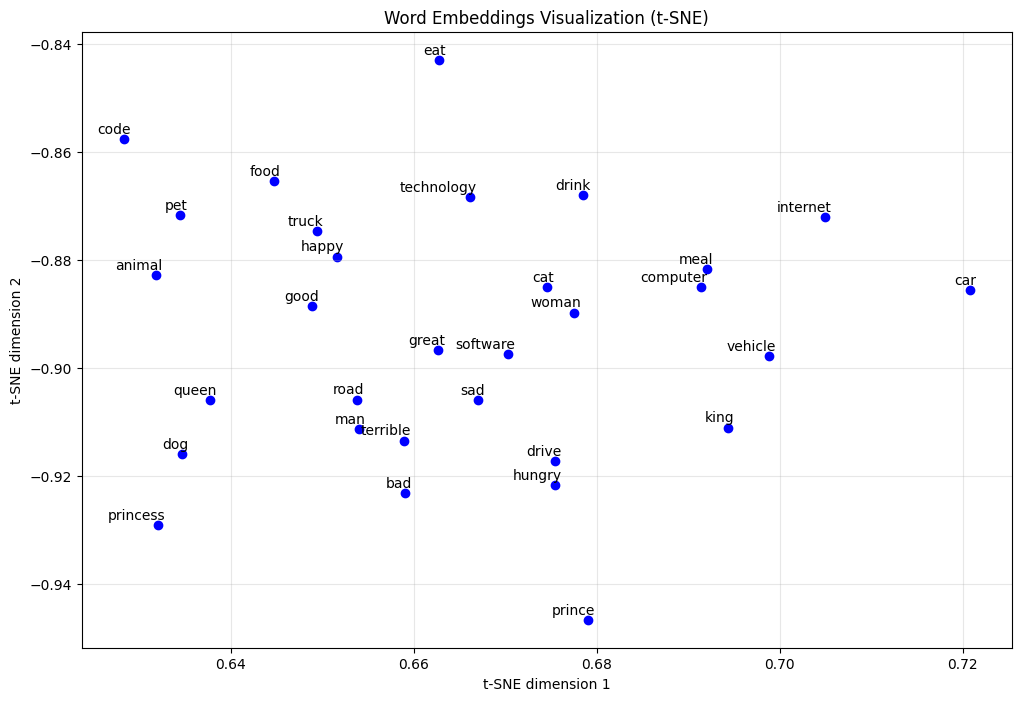

In [35]:
def visualize_embeddings(words, tokenizer, model):
    """Visualize word embeddings using t-SNE"""
    # Get embeddings for selected words
    embeddings = []
    valid_words = []
    
    for word in words:
        if word in tokenizer.get_vocab():
            embedding = get_word_embedding(word, tokenizer, model)
            embeddings.append(embedding)
            valid_words.append(word)
    
    if not embeddings:
        print("No valid words found!")
        return
    
    # Apply t-SNE
    embeddings_matrix = np.array(embeddings)
    tsne = TSNE(n_components=2, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings_matrix)
    
    # Plot
    plt.figure(figsize=(12, 8))
    for i, word in enumerate(valid_words):
        x, y = embeddings_2d[i]
        plt.scatter(x, y, marker='o', color='blue')
        plt.annotate(word, xy=(x, y), xytext=(5, 2), 
                    textcoords='offset points', ha='right', va='bottom')
    
    plt.title('Word Embeddings Visualization (t-SNE)')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.grid(True, alpha=0.3)
    plt.show()

# Select words to visualize
words_to_visualize = [
    "king", "queen", "man", "woman", "prince", "princess",
    "good", "bad", "happy", "sad", "great", "terrible",
    "dog", "cat", "animal", "pet", "puppy", "kitten",
    "computer", "software", "technology", "internet", "code",
    "car", "truck", "vehicle", "drive", "road",
    "food", "eat", "drink", "hungry", "meal"
]

visualize_embeddings(words_to_visualize, tokenizer, model)

In [36]:
# Save embeddings
model.cpu()
torch.save(model.target_embeddings.state_dict(), 'embeddings.pt')

# To load embeddings later:
# loaded_embeddings = nn.Embedding(vocab_size, embedding_dim)
# loaded_embeddings.load_state_dict(torch.load('embeddings.pt'))

# Save full model
torch.save(model.state_dict(), 'skipgram_model.pt')

# Export embeddings to numpy format
embeddings_matrix = model.target_embeddings.weight.detach().numpy()
np.save('embeddings_matrix.npy', embeddings_matrix)

# Save vocabulary mapping
vocab = tokenizer.get_vocab()
import json
with open('vocab.json', 'w') as f:
    json.dump(vocab, f)

print("Model and embeddings saved successfully!")

Model and embeddings saved successfully!


Inference

In [37]:
# Simple Context Generator using Trained Embeddings

import torch
import torch.nn as nn
import numpy as np
import json

# Recreate the SkipGram model architecture
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.target_embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.context_embeddings = nn.Embedding(vocab_size, embedding_dim)
    
    def forward(self, target_ids, context_ids):
        target_embeds = self.target_embeddings(target_ids)
        context_embeds = self.context_embeddings(context_ids)
        scores = torch.sum(target_embeds * context_embeds, dim=1)
        return scores

# Load saved vocabulary
with open('vocab.json', 'r') as f:
    vocab = json.load(f)

# Create reverse mapping (ID to word)
id_to_word = {v: k for k, v in vocab.items()}
vocab_size = len(vocab)
embedding_dim = 100  # Must match your trained model

# Initialize model and load weights
model = SkipGram(vocab_size, embedding_dim)
model.load_state_dict(torch.load('skipgram_model.pt'))
model.eval()

def get_context_words(word, top_k=10):
    """
    Get most likely context words for a given input word
    
    Args:
        word: The input word
        top_k: Number of context words to return
    
    Returns:
        List of (word, probability) tuples
    """
    
    # Check if word exists in vocabulary
    if word not in vocab:
        print(f"Word '{word}' not in vocabulary!")
        return []
    
    # Get word ID
    word_id = vocab[word]
    
    # Create input tensor
    target_tensor = torch.tensor([word_id])
    
    # Get all possible context IDs
    all_context_ids = torch.arange(vocab_size)
    
    with torch.no_grad():
        # Get target embedding
        target_embed = model.target_embeddings(target_tensor)
        
        # Get all context embeddings
        context_embeds = model.context_embeddings(all_context_ids)
        
        # Calculate scores
        scores = torch.matmul(target_embed, context_embeds.t()).squeeze()
        
        # Apply sigmoid to get probabilities
        probs = torch.sigmoid(scores)
        
        # Get top k indices
        top_k_values, top_k_indices = torch.topk(probs, top_k)
        
        # Convert to words
        results = []
        for idx, prob in zip(top_k_indices, top_k_values):
            word = id_to_word.get(idx.item(), "[UNK]")
            results.append((word, prob.item()))
    
    return results

# Example usage
test_words = ["king", "computer", "good", "apples",'apple', "city"]

for word in test_words:
    print(f"\nContext words for '{word}':")
    context_words = get_context_words(word, top_k=10)
    
    if context_words:
        for i, (context_word, prob) in enumerate(context_words, 1):
            print(f"{i}. {context_word}: {prob:.4f}")
    else:
        print(f"Word '{word}' not found in vocabulary")
    print("-" * 40)


Context words for 'king':
1. new: 1.0000
2. after: 1.0000
3. up: 1.0000
4. about: 1.0000
5. into: 1.0000
6. music: 1.0000
7. what: 1.0000
8. October: 1.0000
9. season: 1.0000
10. @-@: 1.0000
----------------------------------------

Context words for 'computer':
1. [SEP]: 1.0000
2. played: 1.0000
3. just: 1.0000
4. ': 1.0000
5. following: 1.0000
6. %: 1.0000
7. do: 1.0000
8. death: 1.0000
9. family: 1.0000
10. began: 1.0000
----------------------------------------

Context words for 'good':
1. gave: 1.0000
2. end: 1.0000
3. State: 1.0000
4. been: 1.0000
5. government: 1.0000
6. stated: 1.0000
7. General: 1.0000
8. announced: 1.0000
9. 19: 1.0000
10. County: 1.0000
----------------------------------------

Context words for 'apples':
1. season: 1.0000
2. ): 1.0000
3. be: 1.0000
4. year: 1.0000
5. may: 1.0000
6. became: 1.0000
7. August: 1.0000
8. character: 1.0000
9. due: 1.0000
10. American: 1.0000
----------------------------------------

Context words for 'apple':
Word 'apple' not i

C:\Temp\ipykernel_25604\685811067.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('skipgram_model.pt'))


# Training an TF-IDF

In [41]:
import numpy as np
import pandas as pd
from collections import Counter
from datasets import load_dataset
import math
import matplotlib.pyplot as plt

print("Loading IMDB dataset from Hugging Face...")
# Load a small subset for demonstration
dataset = load_dataset("stanfordnlp/imdb", split="train[:100]")
documents = dataset["text"]

print(f"✓ Loaded {len(documents)} documents")
print(f"✓ First document preview: {documents[0][:200]}...")
print(f"✓ Average document length: {sum(len(doc.split()) for doc in documents) / len(documents):.0f} words")


Loading IMDB dataset from Hugging Face...


Generating unsupervised split: 100%|██████████| 50000/50000 [00:00<00:00, 179901.40 examples/s]


✓ Loaded 100 documents
✓ First document preview: I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ev...
✓ Average document length: 242 words


In [42]:
def preprocess(text):
    """Simple preprocessing: lowercase and basic tokenization"""
    # Convert to lowercase
    tokens = text.lower().split()
    
    # Remove basic punctuation
    tokens = [token.strip('.,!?;:"()[]{}') for token in tokens]
    
    # Remove empty tokens
    tokens = [token for token in tokens if token]
    
    return tokens

# Test preprocessing
sample_text = "Hello, World! This is a TEST."
print(f"Original: {sample_text}")
print(f"Processed: {preprocess(sample_text)}")

# Process all documents
processed_docs = [preprocess(doc) for doc in documents]
print(f"\n✓ Processed {len(processed_docs)} documents")
print(f"✓ First doc tokens (first 10): {processed_docs[0][:10]}")


Original: Hello, World! This is a TEST.
Processed: ['hello', 'world', 'this', 'is', 'a', 'test']

✓ Processed 100 documents
✓ First doc tokens (first 10): ['i', 'rented', 'i', 'am', 'curious-yellow', 'from', 'my', 'video', 'store', 'because']


Vocabulary Statistics:
- Total unique words: 4830
- First 10 words: ['$100', '$20', '$5', '$5.50', '$6', '$6million', '&', "'60's", "'80s", "'a'"]
- Last 10 words: ['zillion', 'zombie', "zombie's", 'zombie/cannibal', 'zombies', 'zombies.<br', 'zoom-ins', 'zooms', '\x96', '£1']


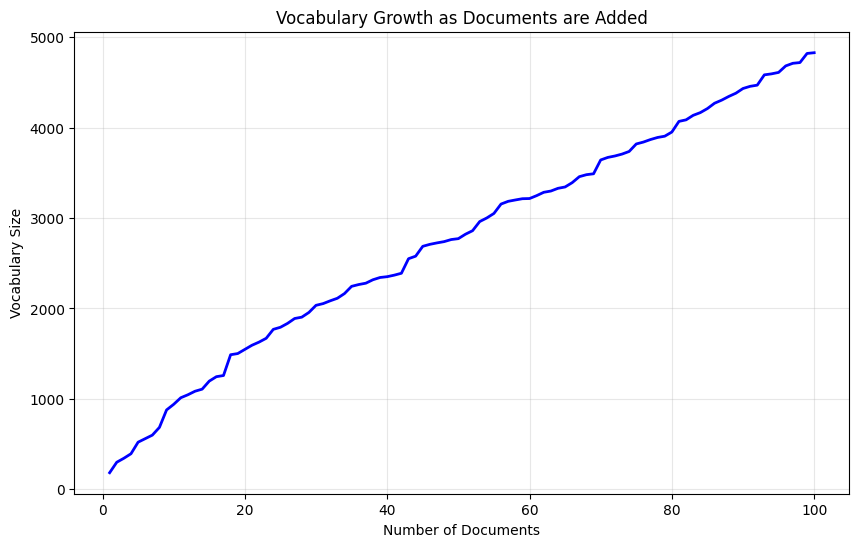

In [59]:
vocabulary = set()
for doc in processed_docs:
    vocabulary.update(doc)

# Convert to sorted list for consistent ordering
vocabulary = sorted(list(vocabulary))
vocab_to_index = {word: idx for idx, word in enumerate(vocabulary)}
index_to_vocab = {idx: word for word, idx in vocab_to_index.items()}

print(f"Vocabulary Statistics:")
print(f"- Total unique words: {len(vocabulary)}")
print(f"- First 10 words: {vocabulary[:10]}")
print(f"- Last 10 words: {vocabulary[-10:]}")

# Visualize vocabulary size growth
vocab_growth = []
cumulative_vocab = set()
for doc in processed_docs:
    cumulative_vocab.update(doc)
    vocab_growth.append(len(cumulative_vocab))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(vocab_growth) + 1), vocab_growth, 'b-', linewidth=2)
plt.xlabel('Number of Documents')
plt.ylabel('Vocabulary Size')
plt.title('Vocabulary Growth as Documents are Added')
plt.grid(True, alpha=0.3)
plt.show()


In [60]:
def calculate_tf(document):
    """
    Calculate Term Frequency for a document
    TF(t,d) = (Number of times term t appears in document d) / (Total terms in document d)
    """
    word_counts = Counter(document)
    doc_length = len(document)
    
    tf_dict = {}
    for word, count in word_counts.items():
        tf_dict[word] = count / doc_length  # Normalized TF
    
    return tf_dict

# Example: Calculate TF for first document
first_doc_tf = calculate_tf(processed_docs[0])

# Show top 10 words by TF in first document
print("Top 10 words by Term Frequency in first document:")
sorted_tf = sorted(first_doc_tf.items(), key=lambda x: x[1], reverse=True)[:10]
for word, score in sorted_tf:
    print(f"{word:15} TF: {score:.4f}")



Top 10 words by Term Frequency in first document:
in              TF: 0.0347
the             TF: 0.0312
to              TF: 0.0312
and             TF: 0.0278
i               TF: 0.0208
of              TF: 0.0208
it              TF: 0.0174
a               TF: 0.0174
sex             TF: 0.0174
that            TF: 0.0139


Top 10 words by IDF (rarest words):
$100            IDF: 4.9120
$20             IDF: 4.9120
$5              IDF: 4.9120
$5.50           IDF: 4.9120
$6              IDF: 4.9120
$6million       IDF: 4.9120
'60's           IDF: 4.9120
'80s            IDF: 4.9120
'a'             IDF: 4.9120
'always'        IDF: 4.9120

Bottom 10 words by IDF (most common words):
i               IDF: 1.1625
is              IDF: 1.1278
it              IDF: 1.1054
in              IDF: 1.0834
of              IDF: 1.0513
this            IDF: 1.0408
a               IDF: 1.0305
and             IDF: 1.0202
to              IDF: 1.0101
the             IDF: 1.0000


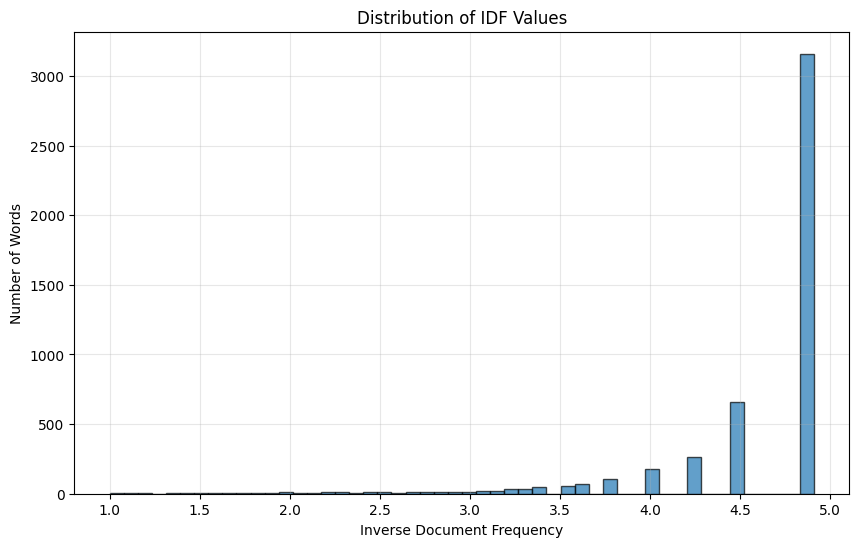

In [46]:
def calculate_idf(documents, vocabulary):
    """
    Calculate IDF for all terms in vocabulary
    IDF(t) = log(Total number of documents / Number of documents containing term t) + 1
    """
    N = len(documents)  # Total number of documents
    idf_dict = {}
    
    for word in vocabulary:
        # Count documents containing the word
        doc_count = sum(1 for doc in documents if word in doc)
        
        # Calculate IDF (add 1 to avoid division by zero and for smoothing)
        idf_dict[word] = math.log(N / (doc_count + 1)) + 1
    
    return idf_dict

# Calculate IDF for our corpus
idf_scores = calculate_idf(processed_docs, vocabulary)

# Show words with highest and lowest IDF
sorted_idf = sorted(idf_scores.items(), key=lambda x: x[1], reverse=True)

print("Top 10 words by IDF (rarest words):")
for word, score in sorted_idf[:10]:
    print(f"{word:15} IDF: {score:.4f}")

print("\nBottom 10 words by IDF (most common words):")
for word, score in sorted_idf[-10:]:
    print(f"{word:15} IDF: {score:.4f}")

# Visualize IDF distribution
idf_values = list(idf_scores.values())
plt.figure(figsize=(10, 6))
plt.hist(idf_values, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Inverse Document Frequency')
plt.ylabel('Number of Words')
plt.title('Distribution of IDF Values')
plt.grid(True, alpha=0.3)
plt.show()

TF calculation: Measures how frequently a term appears in a document

IDF calculation: Measures how rare/important a term is across all documents

TF-IDF calculation: Multiplies TF × IDF to get the final importance score

What TF-IDF means :

TF-IDF assigns high scores to words that appear frequently in a specific document (high TF) but rarely across all documents (high IDF), identifying the most important/distinctive words for each document. It essentially finds words that are characteristic of a particular document while filtering out common words that appear everywhere.

In [ ]:
def calculate_tfidf(tf_dict, idf_dict):
    """
    Calculate TF-IDF scores
    TF-IDF(t,d) = TF(t,d) × IDF(t)
    """
    tfidf_dict = {}
    
    for word, tf_score in tf_dict.items():
        if word in idf_dict:  # Ensure word exists in IDF dictionary
            tfidf_dict[word] = tf_score * idf_dict[word]
    
    return tfidf_dict

# Calculate TF-IDF for first document
first_doc_tfidf = calculate_tfidf(first_doc_tf, idf_scores)

# Show top words by TF-IDF
print("Top 15 words by TF-IDF in first document:")
sorted_tfidf = sorted(first_doc_tfidf.items(), key=lambda x: x[1], reverse=True)[:15]
for word, score in sorted_tfidf:
    tf = first_doc_tf[word]
    idf = idf_scores[word]
    print(f"{word:15} TF-IDF: {score:.4f} (TF: {tf:.4f} × IDF: {idf:.4f})")

Top 15 words by TF-IDF in first document:
sex             TF-IDF: 0.0542 (TF: 0.0174 × IDF: 3.1203)
curious-yellow  TF-IDF: 0.0512 (TF: 0.0104 × IDF: 4.9120)
swedish         TF-IDF: 0.0469 (TF: 0.0104 × IDF: 4.5066)
in              TF-IDF: 0.0376 (TF: 0.0347 × IDF: 1.0834)
shown           TF-IDF: 0.0355 (TF: 0.0104 × IDF: 3.4079)
considered      TF-IDF: 0.0341 (TF: 0.0069 × IDF: 4.9120)
drama           TF-IDF: 0.0341 (TF: 0.0069 × IDF: 4.9120)
pornographic    TF-IDF: 0.0341 (TF: 0.0069 × IDF: 4.9120)
am              TF-IDF: 0.0334 (TF: 0.0104 × IDF: 3.2073)
to              TF-IDF: 0.0316 (TF: 0.0312 × IDF: 1.0101)
cinema          TF-IDF: 0.0313 (TF: 0.0069 × IDF: 4.5066)
the             TF-IDF: 0.0312 (TF: 0.0312 × IDF: 1.0000)
issues          TF-IDF: 0.0293 (TF: 0.0069 × IDF: 4.2189)
and             TF-IDF: 0.0283 (TF: 0.0278 × IDF: 1.0202)
she             TF-IDF: 0.0267 (TF: 0.0104 × IDF: 2.5606)


# RNN's